# **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/churn prediction.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,-1.160323,-0.994971,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,-0.259629,-0.173876,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,-0.362660,-0.960399,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,-0.746535,-0.195400,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,0.197365,-0.941193,...,False,False,False,False,False,False,False,False,True,False


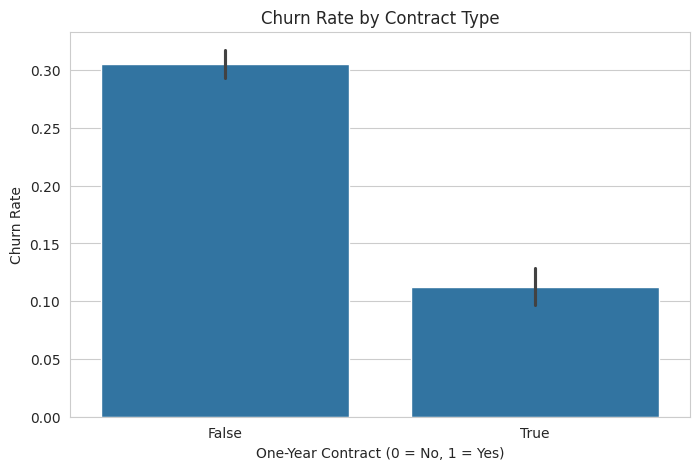

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#Churn rate by Contract Type
plt.figure(figsize=(8, 5))
sns.barplot(x="Contract_One year", y="Churn", data=df, estimator=lambda x: sum(x) / len(x))
plt.xlabel("One-Year Contract (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()



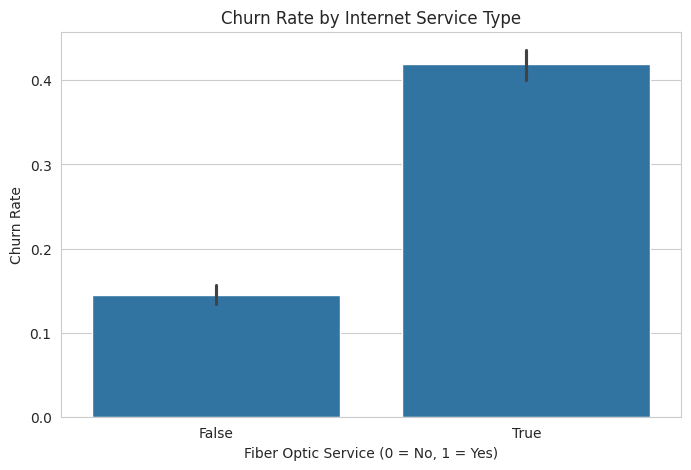

In [5]:
# Churn rate by Internet Service Type
plt.figure(figsize=(8, 5))
sns.barplot(x="InternetService_Fiber optic", y="Churn", data=df, estimator=lambda x: sum(x) / len(x))
plt.xlabel("Fiber Optic Service (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Internet Service Type")
plt.show()



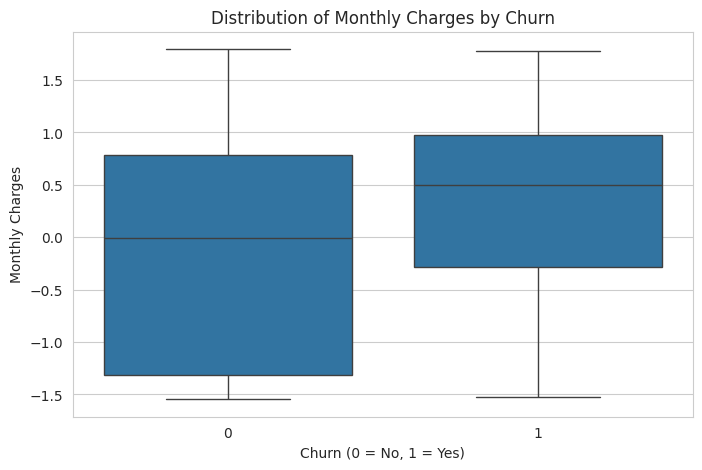

In [6]:
# Distribution of Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.title("Distribution of Monthly Charges by Churn")
plt.show()



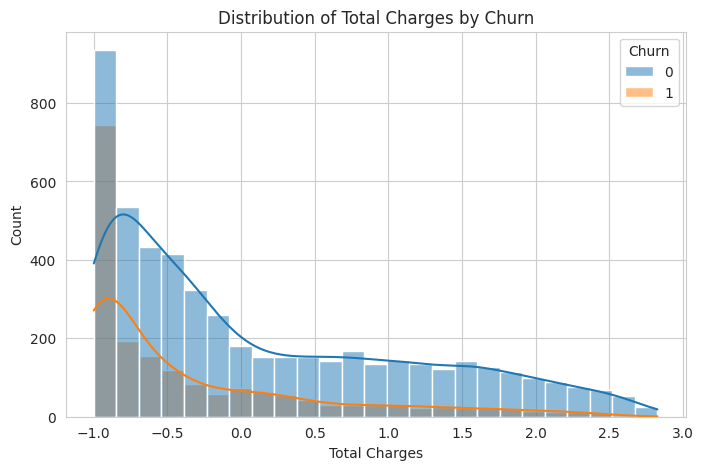

In [7]:
# Distribution of Total Charges by Churn
plt.figure(figsize=(8, 5))
sns.histplot(df, x='TotalCharges', hue='Churn', kde=True) # Added histogram
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.title("Distribution of Total Charges by Churn")
plt.show()


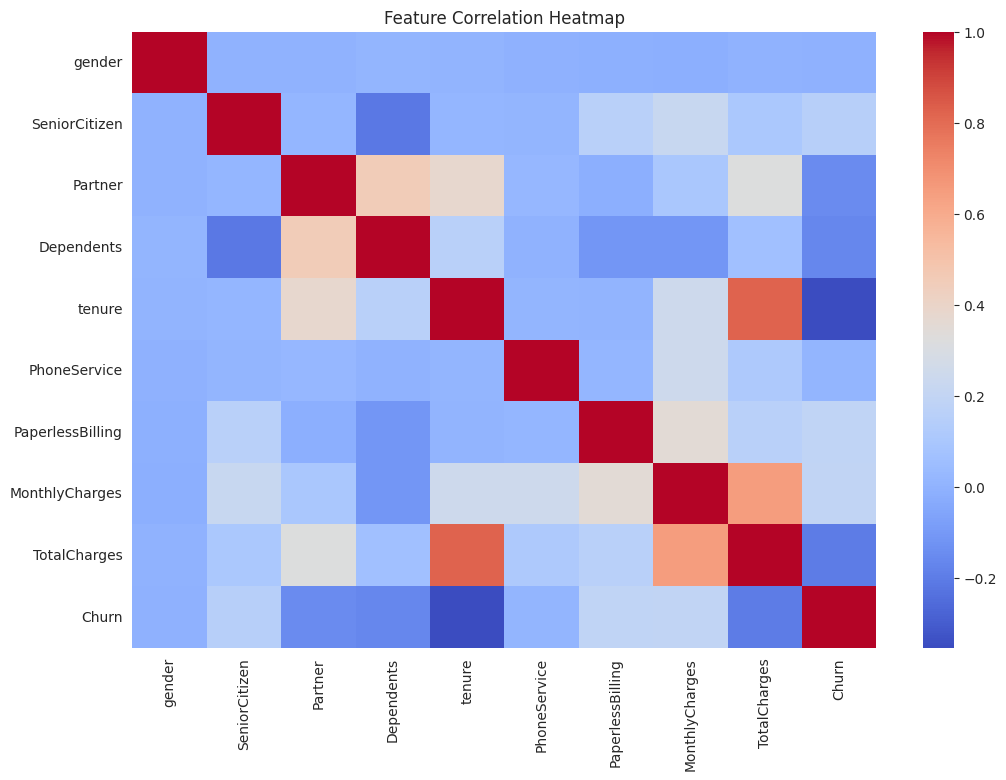

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Feature Engineering**

In [9]:
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

if df['tenure'].dtype == 'object':
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

df['AverageMonthlySpend'] = np.where(
    df['tenure'] > 0,
    df['TotalCharges'] / df['tenure'],
    df['MonthlyCharges']
)

mask = df['AverageMonthlySpend'].isna()
df.loc[mask, 'AverageMonthlySpend'] = df.loc[mask, 'MonthlyCharges']

df['AverageMonthlySpend'] = df['AverageMonthlySpend'].round(2)



In [10]:
df_new=df.copy()

In [11]:
df_new=df_new.drop(columns=['TotalCharges'])

In [12]:
if 'TotalCharges' in df_new.columns:
    print("TotalCharges column is present in the DataFrame.")
else:
    print("TotalCharges column is not present in the DataFrame.")

TotalCharges column is not present in the DataFrame.


# **Model Building**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_new.drop(columns=['Churn','customerID'])
y = df_new['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression Accuracy:", scores.mean())


Logistic Regression Accuracy: 0.8052738336713997


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Random Forest Accuracy:", scores.mean())


Random Forest Accuracy: 0.7855983772819473


In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("XGBoost Accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7780933062880325


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.8008113590263692


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.042222222222222223}
Best Score: 0.7981744421906694


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Model Evaluation**

🔹 Logistic Regression Metrics 🔹
Accuracy: 0.8111689540937056
Precision: 0.6923076923076923
Recall: 0.5487804878048781
F1 Score: 0.6122448979591837
ROC-AUC Score: 0.8635681344282116

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.69      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



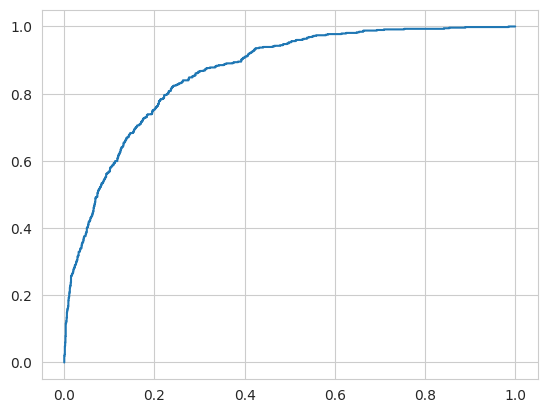

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve # Importing necessary metrics
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("🔹 Logistic Regression Metrics 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_log)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_log)))


🔹 Random Forest Metrics 🔹
Accuracy: 0.7927117841930904
Precision: 0.6683168316831684
Recall: 0.47038327526132406
F1 Score: 0.5521472392638037
ROC-AUC Score: 0.8329093963454254

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



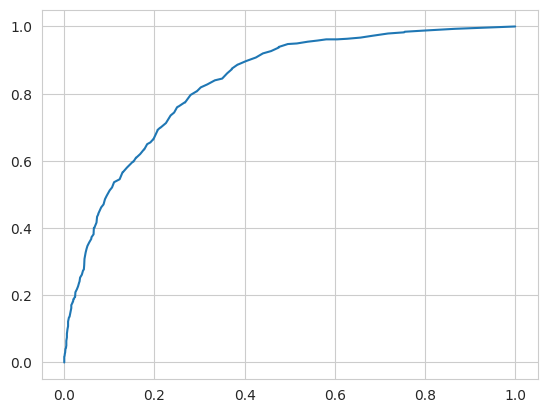

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\n🔹 Random Forest Metrics 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_rf)))



🔹 XGBoost Metrics 🔹
Accuracy: 0.7846663511594889
Precision: 0.622680412371134
Recall: 0.5261324041811847
F1 Score: 0.5703493862134089
ROC-AUC Score: 0.8337425542175221

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.62      0.53      0.57       574

    accuracy                           0.78      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


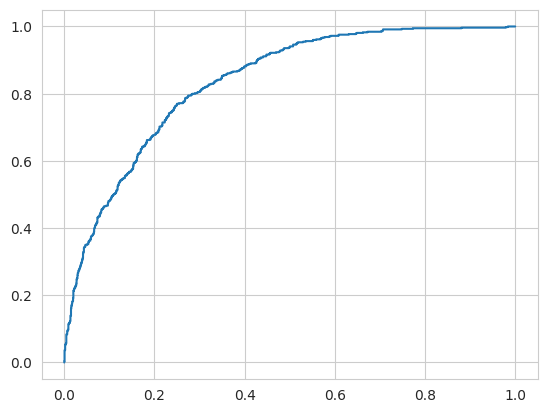

In [21]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\n🔹 XGBoost Metrics 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_xgb)))
